# 4、调用alpha101、alpha191、技术因子、candleresearch或者自己创造衍生因子，要求：任意两个因子，进行画图观察，主要例子看alpha101research和candleresearch，写研究报告（画了什么因子，思考了什么现象，对现象进行描述）


https://github.com/ChannelCMT/formula/wiki

数据类型和周期自定


In [1]:
import warnings

warnings.filterwarnings('ignore')

from jaqs_fxdayu.data.dataservice import LocalDataService
ds = LocalDataService()
from time import time
import talib as ta
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
## 加freq参数

start = time()
path = r'./min_data/VnTrader_1Min_Db'
props = {'fields': 'open,high,low,close,volume','symbol': 'BTCUSDT:binance', 'freq': '4H',
         'start_date':20180601000000}

Time_dict = ds.bar_reader(path,props)
print(time()-start)

from jaqs_fxdayu.data.hf_dataview import HFDataView
dv = HFDataView()

dv.create_init_dv(Time_dict.set_index(["trade_date","symbol"]))

4.91096305847168
Initialize dataview success.


In [2]:
#EMA10
def Plot_EMA(dv, EMA10_J,EMA20_J,EMA60_J,chart_name='EMA10',ShortPeriod=20, LongPeriod=60,n=0):
    fig,(ax,ax1) = plt.subplots(2,1,sharex=True, figsize=(15,15))
    ax.plot(dv.get_ts('close', date_type='datetime').iloc[:,0].iloc[n:])
    ax.set_title(chart_name,fontsize=24,color='b') 
    ax1.plot(EMA10_J.iloc[n:], alpha=0.4, color = 'y')
    ax1.plot(EMA20_J.iloc[n:], alpha=0.4, color = 'b')
    ax1.plot(EMA60_J.iloc[n:], alpha=0.4, color = 'r')
    plt.show()

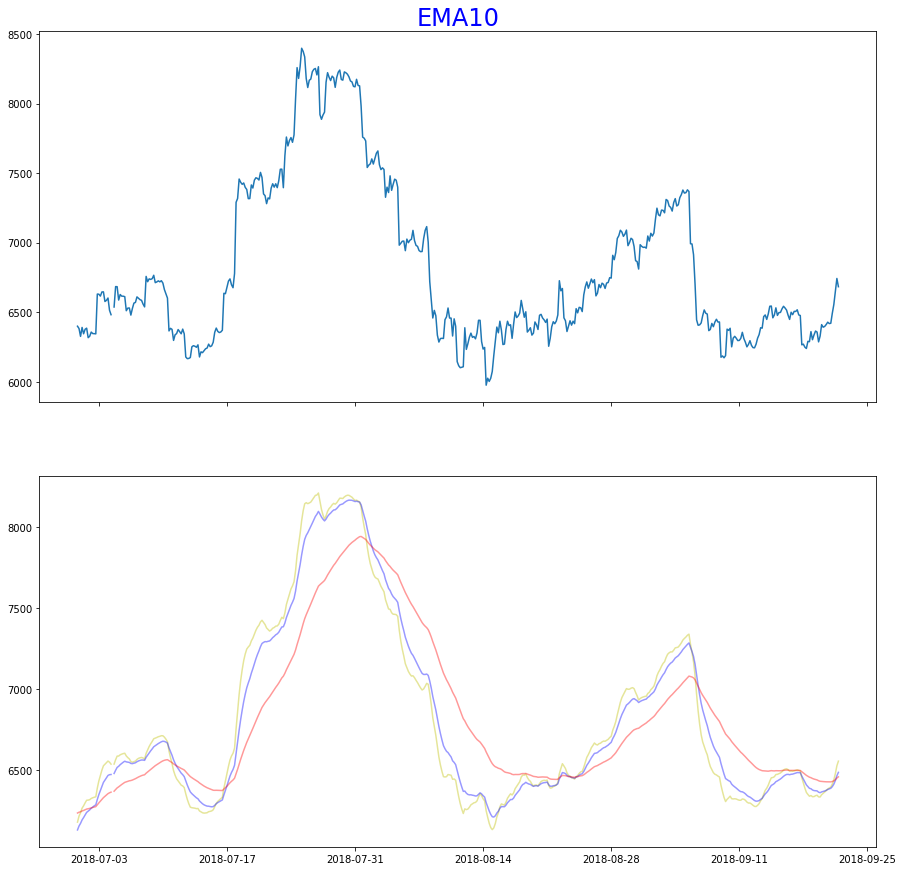

In [3]:
dv.add_formula('EMA10_J', "Ta('EMA',0,0,0,0,close,0,10)", add_data=True)
dv.add_formula('EMA20_J', "Ta('EMA',0,0,0,0,close,0,20)", add_data=True)
dv.add_formula('EMA60_J', "Ta('EMA',0,0,0,0,close,0,60)", add_data=True)
EMA10 = dv.get_ts('EMA10_J', date_type='datetime')
EMA20 = dv.get_ts('EMA20_J', date_type='datetime')
EMA60 = dv.get_ts('EMA60_J', date_type='datetime')
Plot_EMA(dv, EMA10.iloc[:,0],EMA20.iloc[:,0],EMA60.iloc[:,0],n=-500)

#### 因子：技术因子中的EMA10，表示10日的移动指数平均
#### 现象：画图比较了股票收盘价与EMA10因子的值的关系
#### 描述：因子的趋势和收盘价的趋势大致一致

In [4]:
#BBIC
def Plot_BBIC(dv, BBIC, chart_name='BBIC',ShortPeriod=20, LongPeriod=60,n=0):
    fig,(ax,ax1) = plt.subplots(2,1,sharex=True, figsize=(15,15))
    ax.plot(dv.get_ts('close', date_type='datetime').iloc[:,0].iloc[n:])
    ax.set_title(chart_name,fontsize=24,color='b') 
    ax1.plot(BBIC.iloc[n:], alpha=0.4)
    ax1.hlines(1.00, BBIC.iloc[n:].index[0], BBIC.iloc[n:].index[-1], alpha=0.4, linestyle='--')
    ax1.hlines(1.04, BBIC.iloc[n:].index[0], BBIC.iloc[n:].index[-1], alpha=0.4, linestyle='--')
    ax1.hlines(0.96, BBIC.iloc[n:].index[0], BBIC.iloc[n:].index[-1], alpha=0.4, linestyle='--')
    plt.show()
    
dv.add_formula('MA3',"Ta('MA',0,0,0,0,close,0,3)",add_data=True)
dv.add_formula('MA6',"Ta('MA',0,0,0,0,close,0,6)",add_data=True)
dv.add_formula('MA12',"Ta('MA',0,0,0,0,close,0,12)",add_data=True)
dv.add_formula('MA24',"Ta('MA',0,0,0,0,close,0,24)",add_data=True)
dv.add_formula('BBI_J', '((MA3+MA6+MA12+MA24)/4)', add_data=True)
BBIC=dv.add_formula('BBIC_J', 'BBI_J/close', add_data=True)

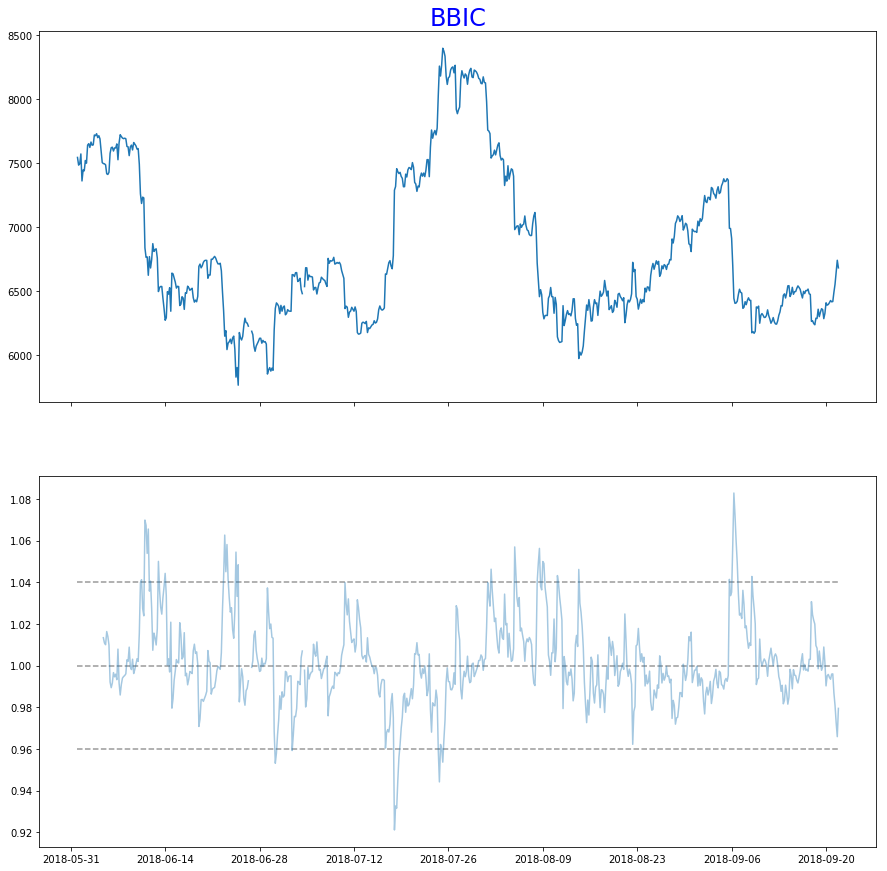

In [5]:
MA3 = dv.get_ts('MA3', date_type='datetime')
MA6 = dv.get_ts('MA6', date_type='datetime')
MA12 = dv.get_ts('MA12', date_type='datetime')
MA24 = dv.get_ts('MA24', date_type='datetime')
BBI = dv.get_ts('BBI_J', date_type='datetime')
BBIC = dv.get_ts('BBIC_J',date_type = 'datetime')
Plot_BBIC(dv, BBIC.iloc[:,0])

#### 因子描述：因子BBI除以收盘价得到(BBI/Close price)
#### 计算方法： BBIC=BBI/close
#### 描述：和大盘的趋势相反

# 5、观察两个因子，和价格图有什么联系，如果是蜡烛图，和成交量有什么联系，怎么找到相应的信号，提出自己信号进出场的假设。（分别完成两个因子的信号假设）

信号进出场假设：可以借鉴MastatiscResearch，但不要将思路假设局限在均线上，可以观察大盘上的其他现象来写信号假设，也可以进行同时满足多个因子的信号来设计信号假设等等。

此处需要说出联系、找到的信号、你的信号进出场假设是什么

##### 因子1:EMA10
因为EMA10的值和大盘走势大致相同，进出场假设如下：
当EMA10从下穿过EMA60，入场，买入
当EMA10从上穿过EMA60，出场，卖空

##### 因子2:BBIC
BBIC与大盘走势相反，进出场假设如下：
当BBIC > 1.04,出场，卖空
当BBIC < 0.96,入场，买入


# 6、将你的其中一个假设落实，如果能完成两个更好，但不强求

利用TimingSignal最后输出long、short、long_short这三个绩效表出来


In [6]:
from jaqs_fxdayu.data.dataservice import LocalDataService
ds = LocalDataService()
from time import time


start = time()
path = r'./min_data/VnTrader_1Min_Db'
props = {'fields': 'open,high,low,close,volume','symbol': 'BTCUSDT:binance', 'freq': '4H',
         'start_date':20180601000000}

Time_dict = ds.bar_reader(path,props)
print(time()-start)

from jaqs_fxdayu.data.hf_dataview import HFDataView
dv = HFDataView()
dv.create_init_dv(Time_dict.set_index(["trade_date","symbol"]))

4.947208881378174
Initialize dataview success.


#### BBIC因子

In [7]:
dv.add_formula('MA3',"Ta('MA',0,0,0,0,close,0,3)",add_data=True)
dv.add_formula('MA6',"Ta('MA',0,0,0,0,close,0,6)",add_data=True)
dv.add_formula('MA12',"Ta('MA',0,0,0,0,close,0,12)",add_data=True)
dv.add_formula('MA24',"Ta('MA',0,0,0,0,close,0,24)",add_data=True)
dv.add_formula('BBI_J', '((MA3+MA6+MA12+MA24)/4)', add_data=True)
BBIC = dv.add_formula('BBIC_J', 'BBI_J/close', add_data=True)

In [8]:
# 进出场条件设置
long = dv.add_formula('long','If((BBIC_J<= 0.96), 2, 0)', add_data=True)
short = dv.add_formula('short','If((BBIC_J >= 1.04),-2, 0)', add_data=True)
closeLong = dv.add_formula('closeLong','If(short==-2,1,0)', add_data=True)
closeShort = dv.add_formula("closeShort",'If(long==2,-1,0)', add_data=True)

In [9]:
from jaqs_fxdayu.research import TimingDigger

tdMaStatistic = TimingDigger(output_folder=".", output_format='pdf',signal_name='MaStatistic')

def TimingSignal(td, dv,long='long', short='short',closeLong='closeLong', closeShort='closeShort', mhp=None,sl=None,sp=None):
    # step 1：实例化TimingDigger 通过output_folder和output_format指定测试报告的输出路径和输出格式，通过signal_name指定绩效文件名称


    #多空分别计算一遍 输出汇总结果
    td.process_signal(
        enter_signal=dv.get_ts("long"),
        exit_signal=dv.get_ts("closeLong"),
        sig_type="long",  # 信号类型 long/short
        price=dv.get_ts("close"),
        max_holding_period=mhp,  # 最大持有天数 可为空
        stoploss=-sl,  # 止损百分比 负数 可为空
        stopprofit=sp,  # 止盈百分比 正数 可为空
    )

    td.process_signal(
        enter_signal=dv.get_ts("short"),
        exit_signal=dv.get_ts("closeShort"),
        sig_type="short",  # 信号类型 long/short
        price=dv.get_ts("close"),
        max_holding_period=mhp,  # 最大持有天数 可为空
        stoploss=-sl,  # 止损百分比 负数 可为空
        stopprofit=sp,  # 止盈百分比 正数 可为空
    )

In [10]:
TimingSignal(tdMaStatistic, dv,'long','short','closeLong','closeShort', 100, 0.15, 0.7)

Nan Data Count (should be zero) : 0;  Percentage of effective data: 2%
Nan Data Count (should be zero) : 0;  Percentage of effective data: 4%


In [11]:
tdMaStatistic.create_event_report(sig_type="long")

*****-Summary-*****
Event Analysis
                      win    loss     all
t-stat              3.136 -14.003   0.236
p-value             0.016   0.005   0.818
mean                0.039  -0.087   0.005
std                 0.033   0.009   0.063
info_ratio          1.185  -9.902   0.075
skewness            1.519  -0.225  -0.262
kurtosis            1.171  -1.500  -0.709
pct5                0.014  -0.097  -0.092
pct25               0.016  -0.092  -0.032
pct50               0.025  -0.086   0.016
pct75               0.049  -0.081   0.040
pct95               0.095  -0.078   0.085
occurance           8.000   3.000  11.000
win_ratio             NaN     NaN   0.727
win_mean/loss_mean    NaN     NaN   0.449


In [12]:
tdMaStatistic.create_event_report(sig_type="short")

*****-Summary-*****
Event Analysis
                       win    loss     all
t-stat              11.822  -6.082   0.368
p-value              0.000   0.000   0.716
mean                 0.101  -0.057   0.006
std                  0.026   0.035   0.083
info_ratio           3.941  -1.625   0.075
skewness             1.511  -1.154   0.180
kurtosis             1.388   1.172  -1.166
pct5                 0.076  -0.118  -0.100
pct25                0.086  -0.069  -0.052
pct50                0.095  -0.050  -0.032
pct75                0.098  -0.036   0.093
pct95                0.149  -0.015   0.122
occurance           10.000  15.000  25.000
win_ratio              NaN     NaN   0.400
win_mean/loss_mean     NaN     NaN   1.776


In [13]:
tdMaStatistic.create_event_report(sig_type="long_short")

*****-Summary-*****
Event Analysis
                       win    loss     all
t-stat               7.155  -7.495   0.440
p-value              0.000   0.000   0.662
mean                 0.073  -0.062   0.006
std                  0.042   0.034   0.078
info_ratio           1.735  -1.818   0.074
skewness             0.159  -0.742   0.118
kurtosis            -0.672   0.459  -1.004
pct5                 0.015  -0.111  -0.100
pct25                0.036  -0.084  -0.054
pct50                0.082  -0.057   0.003
pct75                0.096  -0.036   0.081
pct95                0.134  -0.017   0.120
occurance           18.000  18.000  36.000
win_ratio              NaN     NaN   0.500
win_mean/loss_mean     NaN     NaN   1.187


#### EOSUSDT:binance数据

In [14]:
from jaqs_fxdayu.data.dataservice import LocalDataService
ds = LocalDataService()
from time import time
## 加freq参数

start = time()
path = r'./min_data/VnTrader_1Min_Db'
props = {'fields': 'open,high,low,close,volume','symbol': 'EOSUSDT:binance', 'freq': '4H',
         'start_date':20180601000000}

Time_dict = ds.bar_reader(path,props)

In [15]:
dv.create_init_dv(Time_dict.set_index(["trade_date","symbol"]))

Initialize dataview success.


#### BBIC因子

In [16]:
dv.add_formula('MA3',"Ta('MA',0,0,0,0,close,0,3)",add_data=True)
dv.add_formula('MA6',"Ta('MA',0,0,0,0,close,0,6)",add_data=True)
dv.add_formula('MA12',"Ta('MA',0,0,0,0,close,0,12)",add_data=True)
dv.add_formula('MA24',"Ta('MA',0,0,0,0,close,0,24)",add_data=True)
dv.add_formula('BBI_J', '((MA3+MA6+MA12+MA24)/4)', add_data=True)
BBIC = dv.add_formula('BBIC_J', 'BBI_J/close', add_data=True)

In [17]:
# 进出场条件设置
long = dv.add_formula('long','If((BBIC_J<= 0.96), 2, 0)', add_data=True)
short = dv.add_formula('short','If((BBIC_J >= 1.04),-2, 0)', add_data=True)
closeLong = dv.add_formula('closeLong','If(short==-2,1,0)', add_data=True)
closeShort = dv.add_formula("closeShort",'If(long==2,-1,0)', add_data=True)

In [18]:
from jaqs_fxdayu.research import TimingDigger

tdMaStatistic = TimingDigger(output_folder=".", output_format='pdf',signal_name='MaStatistic')

def TimingSignal(td, dv,long='long', short='short',closeLong='closeLong', closeShort='closeShort', mhp=None,sl=None,sp=None):
    # step 1：实例化TimingDigger 通过output_folder和output_format指定测试报告的输出路径和输出格式，通过signal_name指定绩效文件名称


    #多空分别计算一遍 输出汇总结果
    td.process_signal(
        enter_signal=dv.get_ts("long"),
        exit_signal=dv.get_ts("closeLong"),
        sig_type="long",  # 信号类型 long/short
        price=dv.get_ts("close"),
        max_holding_period=mhp,  # 最大持有天数 可为空
        stoploss=-sl,  # 止损百分比 负数 可为空
        stopprofit=sp,  # 止盈百分比 正数 可为空
    )

    td.process_signal(
        enter_signal=dv.get_ts("short"),
        exit_signal=dv.get_ts("closeShort"),
        sig_type="short",  # 信号类型 long/short
        price=dv.get_ts("close"),
        max_holding_period=mhp,  # 最大持有天数 可为空
        stoploss=-sl,  # 止损百分比 负数 可为空
        stopprofit=sp,  # 止盈百分比 正数 可为空
    )

In [19]:
TimingSignal(tdMaStatistic, dv,'long','short','closeLong','closeShort', 100, 0.15, 0.7)

Nan Data Count (should be zero) : 0;  Percentage of effective data: 7%
Nan Data Count (should be zero) : 0;  Percentage of effective data: 17%


In [20]:
tdMaStatistic.create_event_report(sig_type="long")

*****-Summary-*****
Event Analysis
                      win    loss     all
t-stat              9.805 -12.438  -8.973
p-value             0.010   0.000   0.000
mean                0.069  -0.082  -0.073
std                 0.010   0.044   0.056
info_ratio          6.933  -1.854  -1.295
skewness            0.658  -0.076   0.675
kurtosis           -1.500  -1.030   0.397
pct5                0.061  -0.158  -0.158
pct25               0.062  -0.116  -0.116
pct50               0.064  -0.085  -0.080
pct75               0.074  -0.049  -0.029
pct95               0.082  -0.014   0.032
occurance           3.000  46.000  49.000
win_ratio             NaN     NaN   0.061
win_mean/loss_mean    NaN     NaN   0.843


In [21]:
tdMaStatistic.create_event_report(sig_type="short")

*****-Summary-*****
Event Analysis
                       win    loss      all
t-stat               7.715 -14.751   -0.047
p-value              0.000   0.000    0.963
mean                 0.118  -0.093   -0.001
std                  0.106   0.049    0.131
info_ratio           1.114  -1.873   -0.004
skewness             1.265  -0.282    1.014
kurtosis             0.719  -0.752    0.855
pct5                 0.011  -0.176   -0.167
pct25                0.039  -0.120   -0.098
pct50                0.076  -0.087   -0.031
pct75                0.155  -0.057    0.058
pct95                0.339  -0.017    0.274
occurance           49.000  63.000  112.000
win_ratio              NaN     NaN    0.438
win_mean/loss_mean     NaN     NaN    1.271


In [22]:
tdMaStatistic.create_event_report(sig_type="long_short")

*****-Summary-*****
Event Analysis
                       win     loss      all
t-stat               7.949  -19.258   -2.423
p-value              0.000    0.000    0.017
mean                 0.115   -0.088   -0.023
std                  0.103    0.048    0.118
info_ratio           1.113   -1.853   -0.192
skewness             1.353   -0.239    1.345
kurtosis             0.995   -0.752    2.006
pct5                 0.011   -0.168   -0.162
pct25                0.040   -0.118   -0.101
pct50                0.072   -0.087   -0.055
pct75                0.153   -0.054    0.039
pct95                0.339   -0.015    0.186
occurance           52.000  109.000  161.000
win_ratio              NaN      NaN    0.323
win_mean/loss_mean     NaN      NaN    1.301


In [23]:
dv.add_formula('MA3',"Ta('MA',0,0,0,0,close,0,3)",add_data=True)
dv.add_formula('MA6',"Ta('MA',0,0,0,0,close,0,6)",add_data=True)
dv.add_formula('MA12',"Ta('MA',0,0,0,0,close,0,12)",add_data=True)
dv.add_formula('MA24',"Ta('MA',0,0,0,0,close,0,24)",add_data=True)
dv.add_formula('BBI_J', '((MA3+MA6+MA12+MA24)/4)', add_data=True)
BBIC = dv.add_formula('BBIC_J', 'BBI_J/close', add_data=True)

long = dv.add_formula('long','If((BBIC_J<= 0.98), 2, 0)', add_data=True)
short = dv.add_formula('short','If((BBIC_J >= 1.02),-2, 0)', add_data=True)
closeLong = dv.add_formula('closeLong','If(short==-2,1,0)', add_data=True)
closeShort = dv.add_formula("closeShort",'If(long==2,-1,0)', add_data=True)

from jaqs_fxdayu.research import TimingDigger

tdMaStatistic = TimingDigger(output_folder=".", output_format='pdf',signal_name='MaStatistic')

def TimingSignal(td, dv,long='long', short='short',closeLong='closeLong', closeShort='closeShort', mhp=None,sl=None,sp=None):
    # step 1：实例化TimingDigger 通过output_folder和output_format指定测试报告的输出路径和输出格式，通过signal_name指定绩效文件名称


    #多空分别计算一遍 输出汇总结果
    td.process_signal(
        enter_signal=dv.get_ts("long"),
        exit_signal=dv.get_ts("closeLong"),
        sig_type="long",  # 信号类型 long/short
        price=dv.get_ts("close"),
        max_holding_period=mhp,  # 最大持有天数 可为空
        stoploss=-sl,  # 止损百分比 负数 可为空
        stopprofit=sp,  # 止盈百分比 正数 可为空
    )

    td.process_signal(
        enter_signal=dv.get_ts("short"),
        exit_signal=dv.get_ts("closeShort"),
        sig_type="short",  # 信号类型 long/short
        price=dv.get_ts("close"),
        max_holding_period=mhp,  # 最大持有天数 可为空
        stoploss=-sl,  # 止损百分比 负数 可为空
        stopprofit=sp,  # 止盈百分比 正数 可为空
    )

TimingSignal(tdMaStatistic, dv,'long','short','closeLong','closeShort', 100, 0.15, 0.7)

Field [MA3] is overwritten.
Field [MA6] is overwritten.
Field [MA12] is overwritten.
Field [MA24] is overwritten.
Field [BBI_J] is overwritten.
Field [BBIC_J] is overwritten.
Field [long] is overwritten.
Field [short] is overwritten.
Field [closeLong] is overwritten.
Field [closeShort] is overwritten.
Nan Data Count (should be zero) : 0;  Percentage of effective data: 18%
Nan Data Count (should be zero) : 0;  Percentage of effective data: 29%


In [24]:
tdMaStatistic.create_event_report(sig_type="long")

*****-Summary-*****
Event Analysis
                       win    loss      all
t-stat               8.785 -17.274    0.345
p-value              0.000   0.000    0.731
mean                 0.105  -0.063    0.003
std                  0.082   0.031    0.100
info_ratio           1.281  -2.022    0.031
skewness             0.835  -0.632    1.107
kurtosis            -0.362   0.100    0.619
pct5                 0.006  -0.122   -0.119
pct25                0.049  -0.086   -0.062
pct50                0.070  -0.057   -0.034
pct75                0.162  -0.041    0.060
pct95                0.266  -0.021    0.209
occurance           48.000  74.000  122.000
win_ratio              NaN     NaN    0.393
win_mean/loss_mean     NaN     NaN    1.668


In [25]:
tdMaStatistic.create_event_report(sig_type="short")

*****-Summary-*****
Event Analysis
                        win    loss      all
t-stat               12.756 -12.791    6.084
p-value               0.000   0.000    0.000
mean                  0.164  -0.048    0.062
std                   0.128   0.036    0.143
info_ratio            1.276  -1.334    0.438
skewness              0.507  -1.215    0.980
kurtosis             -1.085   1.844   -0.073
pct5                  0.006  -0.103   -0.088
pct25                 0.053  -0.069   -0.038
pct50                 0.142  -0.040    0.005
pct75                 0.250  -0.022    0.150
pct95                 0.387  -0.006    0.360
occurance           101.000  93.000  194.000
win_ratio               NaN     NaN    0.521
win_mean/loss_mean      NaN     NaN    3.443


In [26]:
tdMaStatistic.create_event_report(sig_type="long_short")

*****-Summary-*****
Event Analysis
                        win     loss      all
t-stat               14.850  -20.255    5.355
p-value               0.000    0.000    0.000
mean                  0.145   -0.054    0.040
std                   0.119    0.035    0.131
info_ratio            1.221   -1.572    0.302
skewness              0.738   -0.864    1.153
kurtosis             -0.645    0.835    0.561
pct5                  0.006   -0.120   -0.096
pct25                 0.051   -0.076   -0.053
pct50                 0.108   -0.050   -0.009
pct75                 0.209   -0.026    0.097
pct95                 0.372   -0.009    0.351
occurance           149.000  167.000  316.000
win_ratio               NaN      NaN    0.472
win_mean/loss_mean      NaN      NaN    2.661
